0 columns were processed.


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


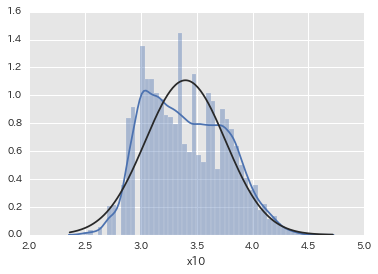

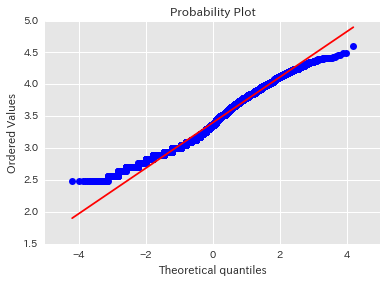

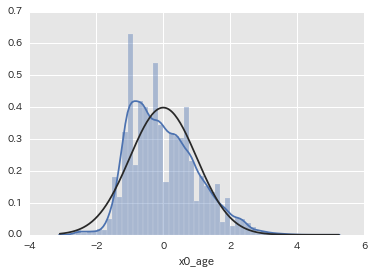

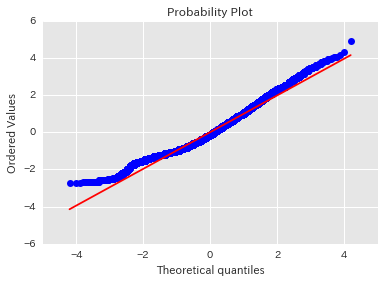

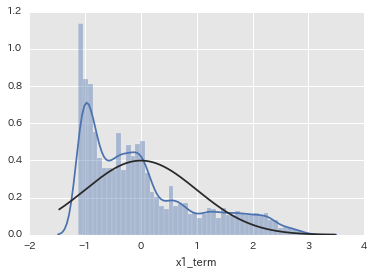

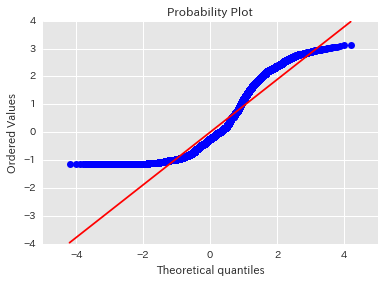

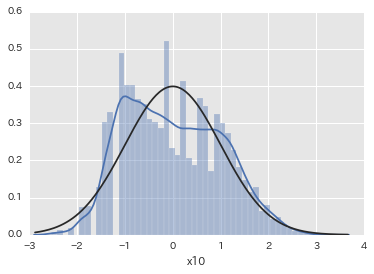

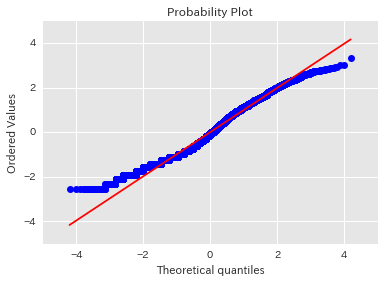

Most Positive Correlations:
 x5_６      0.038371
x5_3      0.038839
x3        0.043521
x5_8      0.050944
x5_7      0.051449
x2_sex    0.053075
x5_9      0.055862
x55_0     0.063321
x5_10     0.067543
x41_2     0.118970
x44       0.164004
x42       0.165785
x43_1     0.173362
x45_2     0.173362
y         1.000000
Name: y, dtype: float64

Most Negative Correlations:
 x6_2      -0.141312
x1_term   -0.135641
x45_1     -0.126614
x56       -0.104736
x4        -0.071746
x41_0     -0.062895
x13_2     -0.053456
x55_3     -0.043559
x0_age    -0.028117
x57       -0.026069
x55_1     -0.024063
x55_4     -0.020378
x6_1      -0.017630
x52       -0.013478
x9_2      -0.010222
Name: y, dtype: float64


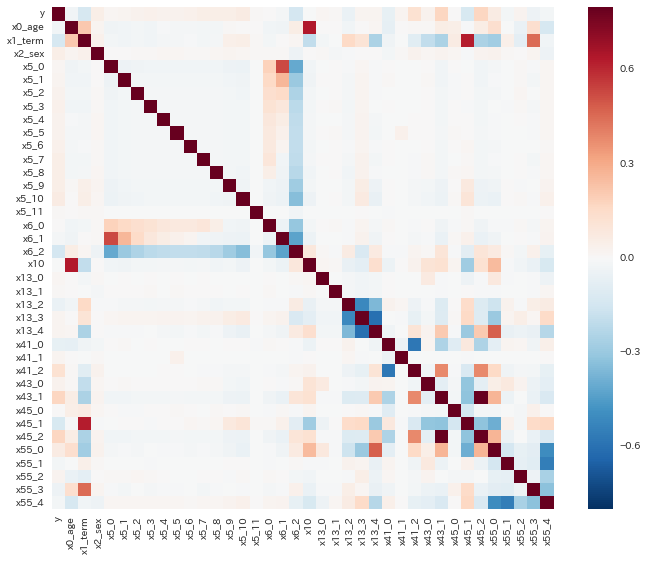

Most Positive Correlations:
 x5_4      0.031747
x5_2      0.032363
x43_0     0.033934
x5_６      0.038371
x5_3      0.038839
x5_8      0.050944
x5_7      0.051449
x2_sex    0.053075
x5_9      0.055862
x55_0     0.063321
x5_10     0.067543
x41_2     0.118970
x43_1     0.173362
x45_2     0.173362
y         1.000000
Name: y, dtype: float64

Most Negative Correlations:
 x6_2      -0.141312
x1_term   -0.135641
x45_1     -0.126614
x41_0     -0.062895
x13_2     -0.053456
x55_3     -0.043559
x0_age    -0.028117
x55_1     -0.024063
x55_4     -0.020378
x6_1      -0.017630
x10       -0.004102
x6_0       0.001643
x45_0      0.004731
x13_1      0.008188
x5_11      0.009419
Name: y, dtype: float64


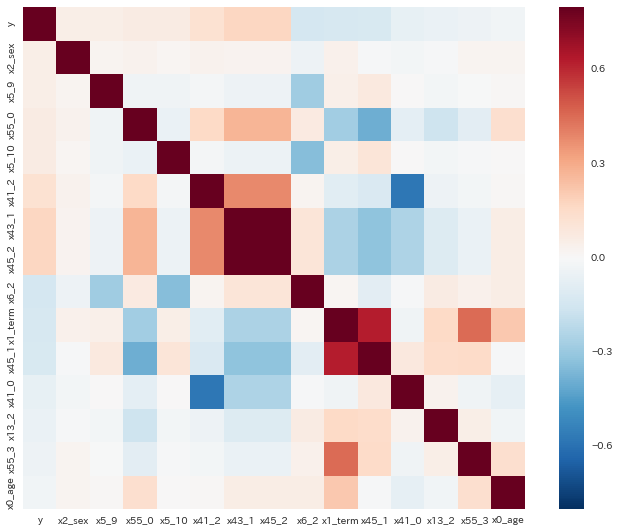

In [1]:
%run 1_nishioka_data_preparation.ipynb
#df_trainがデータセット

In [2]:
#1.1. 全データを配列へ変換
from sklearn.cross_validation import train_test_split
import numpy as np

X = df_output.drop("y" , axis=1).values
y = df_output["y"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
#2. 学習
import numpy as np
import scipy as sp
import xgboost as xgb
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
predict = xgb_model.predict(X_test)

/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


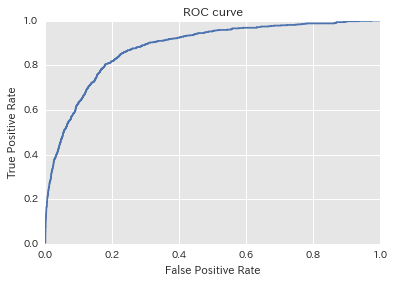

In [4]:
from sklearn import metrics as mtr
%matplotlib inline
from matplotlib import pyplot as plt

prob = xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = mtr.roc_curve(y_test, prob,pos_label =1)

plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [5]:
# 3.まとめ（精度計算）

class_predict = xgb_model.predict(X_test)
print('テストデータに対する正解率： %.4f' %mtr.accuracy_score(y_test,class_predict))
print('テストデータに対する roc-auc： %.4f' %mtr.roc_auc_score(y_test, prob))
print('テストデータに対する log-loss： %.4f' %mtr.log_loss(y_test, prob))

テストデータに対する正解率： 0.9579
テストデータに対する roc-auc： 0.8804
テストデータに対する log-loss： 0.1330


In [6]:
#RandomizedSearchCVを使用した学習
param_distributions={'max_depth': sp.stats.randint(1,11),
                     'subsample': sp.stats.uniform(0.5,0.5),
                     'colsample_bytree': sp.stats.uniform(0.5,0.5)
}

xgb_model = xgb.XGBClassifier()
rs = RandomizedSearchCV(xgb_model,
                        param_distributions,
                        cv=10,
                        n_iter=20,
                        scoring="log_loss",
                        n_jobs=1,
                        verbose=2)
rs.fit(X_train, y_train)
predict = rs.predict(X_test)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s remaining:    0.0s


[CV]  max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 -  10.6s
[CV] max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 -  10.7s
[CV] max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 -  10.7s
[CV] max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 -  10.6s
[CV] max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 -  10.6s
[CV] max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 -  10.5s
[CV] max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 -  10.6s
[CV] max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 -  10.9s
[CV] max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 -  10.7s
[CV] max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.613166276195, colsample_bytree=0.887314100306 -  10.7s
[CV] max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 -   5.2s
[CV] max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 -   5.2s
[CV] max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 -   5.2s
[CV] max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 -   5.2s
[CV] max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 -   5.1s
[CV] max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 -   5.1s
[CV] max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 -   5.1s
[CV] max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 -   5.1s
[CV] max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 -   5.2s
[CV] max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.575715986046, colsample_bytree=0.566411029836 -   5.2s
[CV] max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 -   2.9s
[CV] max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 -   2.9s
[CV] max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 -   2.9s
[CV] max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 -   2.9s
[CV] max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 -   2.8s
[CV] max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 -   2.8s
[CV] max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 -   2.8s
[CV] max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 -   2.8s
[CV] max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 -   2.9s
[CV] max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.543104005935, colsample_bytree=0.554642594175 -   2.9s
[CV] max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 -   9.8s
[CV] max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 -  10.0s
[CV] max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 -   9.7s
[CV] max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 -   9.7s
[CV] max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 -   9.7s
[CV] max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 -   9.7s
[CV] max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 -   9.7s
[CV] max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 -   9.9s
[CV] max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 -   9.7s
[CV] max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.738557526015, colsample_bytree=0.722995470106 -   9.7s
[CV] max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 -   7.2s
[CV] max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 -   7.2s
[CV] max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 -   7.3s
[CV] max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 -   7.2s
[CV] max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 -   7.6s
[CV] max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 -   7.1s
[CV] max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 -   7.1s
[CV] max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 -   7.1s
[CV] max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 -   7.2s
[CV] max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=4, subsample=0.617404160037, colsample_bytree=0.882561426545 -   7.2s
[CV] max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 -  13.7s
[CV] max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 -  13.8s
[CV] max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 -  13.8s
[CV] max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 -  13.8s
[CV] max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 -  13.7s
[CV] max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 -  14.2s
[CV] max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 -  13.7s
[CV] max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 -  13.6s
[CV] max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 -  13.8s
[CV] max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.56394993616, colsample_bytree=0.955655013222 -  13.7s
[CV] max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 -   3.3s
[CV] max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 -   3.4s
[CV] max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 -   3.4s
[CV] max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 -   3.3s
[CV] max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 -   3.3s
[CV] max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 -   3.3s
[CV] max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 -   3.3s
[CV] max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 -   3.3s
[CV] max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 -   3.3s
[CV] max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=3, subsample=0.947611900466, colsample_bytree=0.628112214457 -   3.3s
[CV] max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 -   5.5s
[CV] max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 -   5.5s
[CV] max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 -   5.5s
[CV] max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 -   5.5s
[CV] max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 -   5.6s
[CV] max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 -   6.3s
[CV] max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 -   5.5s
[CV] max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 -   5.5s
[CV] max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 -   5.6s
[CV] max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.985849132283, colsample_bytree=0.55097585456 -   5.5s
[CV] max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 -   7.3s
[CV] max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 -   7.2s
[CV] max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 -   7.2s
[CV] max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 -   7.2s
[CV] max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 -   7.3s
[CV] max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 -   7.2s
[CV] max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 -   7.2s
[CV] max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 -   7.2s
[CV] max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 -   7.3s
[CV] max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.500631501018, colsample_bytree=0.544689129178 -   7.3s
[CV] max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 -   3.2s
[CV] max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 -   3.2s
[CV] max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 -   3.2s
[CV] max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 -   3.2s
[CV] max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 -   3.2s
[CV] max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 -   3.2s
[CV] max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 -   3.9s
[CV] max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 -   3.2s
[CV] max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 -   3.2s
[CV] max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.65632258757, colsample_bytree=0.709466695968 -   3.2s
[CV] max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 -   3.0s
[CV] max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 -   3.0s
[CV] max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 -   3.0s
[CV] max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 -   3.0s
[CV] max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 -   3.0s
[CV] max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 -   3.0s
[CV] max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 -   3.0s
[CV] max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 -   3.0s
[CV] max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 -   3.0s
[CV] max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, subsample=0.837588306545, colsample_bytree=0.757492371142 -   3.0s
[CV] max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 -  12.7s
[CV] max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 -  12.7s
[CV] max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 -  12.6s
[CV] max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 -  12.6s
[CV] max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 -  12.6s
[CV] max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 -  12.6s
[CV] max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 -  13.5s
[CV] max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 -  12.6s
[CV] max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 -  12.6s
[CV] max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.745713683153, colsample_bytree=0.994711368166 -  12.6s
[CV] max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 -   9.3s
[CV] max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 -   9.4s
[CV] max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 -   9.3s
[CV] max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 -   9.3s
[CV] max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 -   9.3s
[CV] max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 -   9.3s
[CV] max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 -   9.3s
[CV] max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 -  10.3s
[CV] max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 -   9.4s
[CV] max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.626717832001, colsample_bytree=0.635453086919 -   9.4s
[CV] max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 -   8.3s
[CV] max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 -   8.4s
[CV] max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 -   8.4s
[CV] max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 -   8.4s
[CV] max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 -   8.4s
[CV] max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 -   8.4s
[CV] max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 -   8.4s
[CV] max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 -   8.4s
[CV] max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 -   8.4s
[CV] max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.720313397641, colsample_bytree=0.729498248773 -   8.4s
[CV] max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 -  18.4s
[CV] max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 -  17.3s
[CV] max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 -  17.3s
[CV] max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 -  17.3s
[CV] max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 -  17.1s
[CV] max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 -  16.9s
[CV] max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 -  16.8s
[CV] max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 -  18.2s
[CV] max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 -  17.2s
[CV] max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, subsample=0.516417725446, colsample_bytree=0.840425539452 -  17.2s
[CV] max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 -   7.7s
[CV] max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 -   7.7s
[CV] max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 -   7.8s
[CV] max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 -   7.8s
[CV] max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 -   7.8s
[CV] max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 -   7.7s
[CV] max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 -   7.7s
[CV] max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 -   7.7s
[CV] max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 -   7.7s
[CV] max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.654750125778, colsample_bytree=0.625914837338 -   7.7s
[CV] max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 -  10.8s
[CV] max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 -   9.7s
[CV] max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 -   9.6s
[CV] max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 -   9.6s
[CV] max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 -   9.6s
[CV] max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 -   9.6s
[CV] max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 -   9.6s
[CV] max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 -   9.6s
[CV] max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 -   9.6s
[CV] max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=6, subsample=0.532250766724, colsample_bytree=0.749335784712 -   9.6s
[CV] max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 -   7.0s
[CV] max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 -   7.1s
[CV] max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 -   7.1s
[CV] max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 -   8.4s
[CV] max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 -   7.1s
[CV] max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 -   7.1s
[CV] max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 -   7.1s
[CV] max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 -   7.0s
[CV] max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 -   7.0s
[CV] max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, subsample=0.984854715237, colsample_bytree=0.93432443525 -   7.1s
[CV] max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 -  16.9s
[CV] max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 -  16.9s
[CV] max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 -  17.0s
[CV] max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 -  17.0s
[CV] max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 -  18.3s
[CV] max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 -  16.9s
[CV] max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 -  16.9s
[CV] max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 -  17.1s
[CV] max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 -  17.0s
[CV] max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=9, subsample=0.694655380199, colsample_bytree=0.97913691528 -  17.1s
[CV] max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 -   9.6s
[CV] max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 -   9.7s
[CV] max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 -  11.0s
[CV] max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 -   9.7s
[CV] max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 -   9.6s
[CV] max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 -   9.7s
[CV] max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 -   9.7s
[CV] max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 -   9.6s
[CV] max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 -   9.7s
[CV] max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 28.6min finished


[CV]  max_depth=7, subsample=0.914658744023, colsample_bytree=0.82947817758 -   9.7s


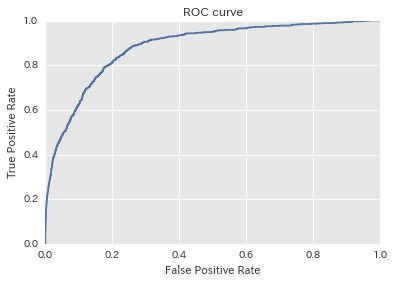

In [9]:
from sklearn import metrics as mtr
%matplotlib inline
from matplotlib import pyplot as plt

prob = rs.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = mtr.roc_curve(y_test, prob,pos_label =1)

plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [10]:
# 3.まとめ（精度計算）

class_predict = rs.predict(X_test)
print('テストデータに対する正解率： %.4f' %mtr.accuracy_score(y_test,class_predict))
print('テストデータに対する roc-auc： %.4f' %mtr.roc_auc_score(y_test, prob))
print('テストデータに対する log-loss： %.4f' %mtr.log_loss(y_test, prob))

テストデータに対する正解率： 0.9587
テストデータに対する roc-auc： 0.8825
テストデータに対する log-loss： 0.1309


In [12]:
rs.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1,
       colsample_bytree=0.7294982487729671, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='binary:logistic',
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.72031339764054869)

### best score
XGBClassifier(base_score=0.5, colsample_bylevel=1,
       colsample_bytree=0.7294982487729671, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='binary:logistic',
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.72031339764054869)

テストデータに対する正解率： 0.9587
テストデータに対する roc-auc： 0.8825
テストデータに対する log-loss： 0.1309

### 参考文献
http://yag.xyz/blog/2015/08/08/xgboost-python/